In [ ]:
import pandas as pd

# Load the dataset
df = pd.read_csv('/content/ICU.csv')

# Descriptive statistics
desc_stats = df.describe(include='all')

# Checking for missing values
missing_values = df.isnull().sum()

# Central Tendency and Dispersion
mean_values = df.mean()
mode_values = df.mode().iloc[0]
std_dev = df.std()
skewness = df.skew()

# Display results
print("Descriptive Statistics:\n", desc_stats)
print("\nMissing Values:\n", missing_values)
print("\nMean Values:\n", mean_values)
print("\nMode Values:\n", mode_values)
print("\nStandard Deviation:\n", std_dev)
print("\nSkewness:\n", skewness)

Descriptive Statistics:
        Unnamed: 0         ID     Survive         Age    AgeGroup         Sex  \
count  200.000000  200.00000  200.000000  200.000000  200.000000  200.000000   
mean   100.500000  444.82000    0.800000   57.545000    2.025000    0.380000   
std     57.879185  271.91668    0.401004   20.054648    0.785788    0.486604   
min      1.000000    4.00000    0.000000   16.000000    1.000000    0.000000   
25%     50.750000  210.25000    1.000000   46.750000    1.000000    0.000000   
50%    100.500000  412.50000    1.000000   63.000000    2.000000    0.000000   
75%    150.250000  671.75000    1.000000   72.000000    3.000000    1.000000   
max    200.000000  929.00000    1.000000   92.000000    3.000000    1.000000   

        Infection       SysBP      Pulse   Emergency  
count  200.000000  200.000000  200.00000  200.000000  
mean     0.420000  132.280000   98.92500    0.735000  
std      0.494797   32.952099   26.82962    0.442441  
min      0.000000   36.000000   39

In [ ]:
# Check for duplicates
duplicates = df.duplicated().sum()
print(f"Number of duplicate rows: {duplicates}")

# Remove duplicates if any
df = df.drop_duplicates()


Number of duplicate rows: 0


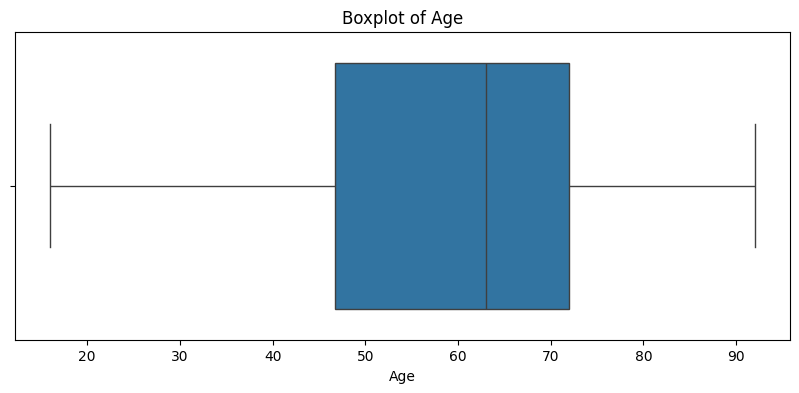

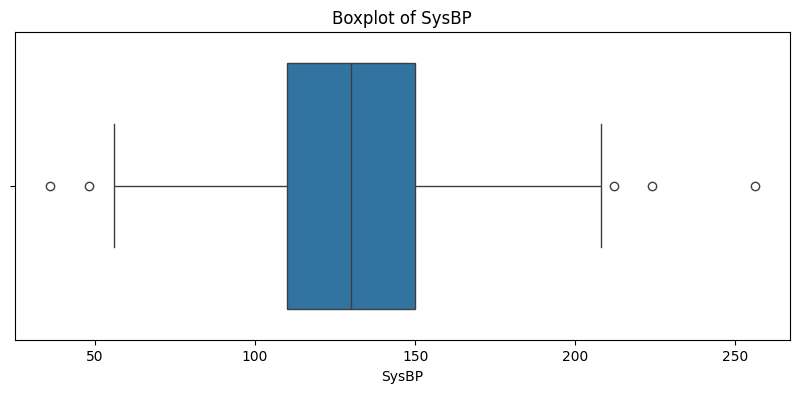

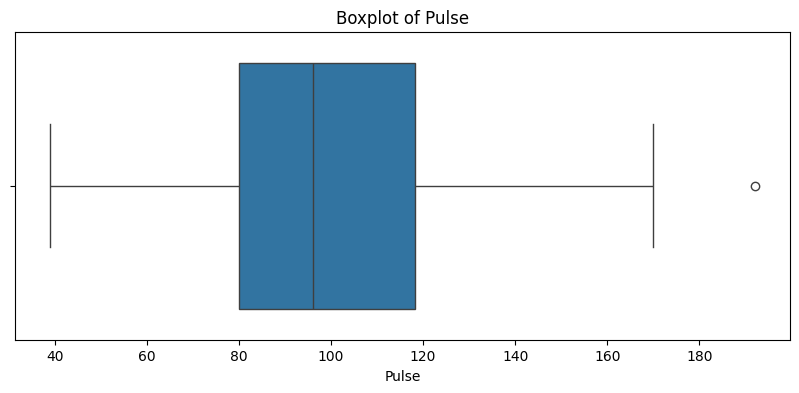

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Visualizing outliers using boxplots
for column in ['Age', 'SysBP', 'Pulse']:
    plt.figure(figsize=(10, 4))
    sns.boxplot(x=df[column])
    plt.title(f'Boxplot of {column}')
    plt.show()


In [ ]:
print("Column names:", df.columns)

df.columns = df.columns.str.strip()

print("Cleaned Column names:", df.columns)


Column names: Index(['Unnamed: 0', 'ID', 'Survive', 'Age', 'AgeGroup', 'Sex', 'Infection',
       'SysBP', 'Pulse', 'Emergency'],
      dtype='object')
Cleaned Column names: Index(['Unnamed: 0', 'ID', 'Survive', 'Age', 'AgeGroup', 'Sex', 'Infection',
       'SysBP', 'Pulse', 'Emergency'],
      dtype='object')


In [ ]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

categorical_cols = ['Sex', 'AgeGroup', 'Infection', 'Emergency']

for col in categorical_cols:
    if col in df.columns:
        df[col] = le.fit_transform(df[col])
    else:
        print(f"Column {col} not found in the DataFrame.")


In [ ]:
from sklearn.preprocessing import StandardScaler


scaler = StandardScaler()
scaled_features = ['Age', 'SysBP', 'Pulse']
df[scaled_features] = scaler.fit_transform(df[scaled_features])


In [ ]:
from imblearn.over_sampling import SMOTE

X = df.drop('Survive', axis=1)
y = df['Survive']

smote = SMOTE(random_state=42)
X_res, y_res = smote.fit_resample(X, y)

print(f"Resampled dataset shape: {X_res.shape}, {y_res.shape}")
print(f"Class distribution after resampling:\n{y_res.value_counts()}")


Resampled dataset shape: (320, 9), (320,)
Class distribution after resampling:
Survive
0    160
1    160
Name: count, dtype: int64


# **step3**

In [ ]:
from sklearn.preprocessing import MinMaxScaler

# Normalizing the features
scaler = MinMaxScaler()
normalized_features = ['Age', 'SysBP', 'Pulse']
df[normalized_features] = scaler.fit_transform(df[normalized_features])

print(df[normalized_features].head())


        Age     SysBP     Pulse
0  0.934211  0.200000  0.372549
1  0.144737  0.481818  0.320261
2  0.565789  0.345455  0.267974
3  0.802632  0.290909  0.202614
4  0.789474  0.418182  0.333333


In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
standardized_features = ['Age', 'SysBP', 'Pulse']
df[standardized_features] = scaler.fit_transform(df[standardized_features])

print(df[standardized_features].head())

        Age     SysBP     Pulse
0  1.472422 -1.590527 -0.109295
1 -1.526910  0.295714 -0.408221
2  0.072734 -0.616983 -0.707147
3  0.972534 -0.982062 -1.080805
4  0.922545 -0.130211 -0.333489


In [ ]:
import numpy as np

# Equal-width binning for Age
df['Age_binned'] = pd.cut(df['Age'], bins=5)  # 5 equal-width bins
print(df['Age_binned'].value_counts())  # Check distribution in bins

# Equal-frequency binning for SysBP
df['SysBP_binned'] = pd.qcut(df['SysBP'], q=4)  # 4 equal-frequency bins
print(df['SysBP_binned'].value_counts())  # Check distribution in bins


Age_binned
(0.203, 0.963]      75
(-0.557, 0.203]     46
(-2.081, -1.317]    31
(0.963, 1.722]      29
(-1.317, -0.557]    19
Name: count, dtype: int64
SysBP_binned
(-2.9299999999999997, -0.678]    53
(-0.0694, 0.539]                 52
(-0.678, -0.0694]                48
(0.539, 3.764]                   47
Name: count, dtype: int64


In [ ]:
from sklearn.preprocessing import PolynomialFeatures

# Generating polynomial features
poly = PolynomialFeatures(degree=2, include_bias=False)
poly_features = poly.fit_transform(df[['Age', 'SysBP', 'Pulse']])

# Convert back to DataFrame and concatenate with original data
poly_df = pd.DataFrame(poly_features, columns=poly.get_feature_names_out(['Age', 'SysBP', 'Pulse']))
df = pd.concat([df, poly_df], axis=1)

print(df.head())  # Check the first few rows after adding polynomial features


   Unnamed: 0  ID  Survive       Age  AgeGroup  Sex  Infection     SysBP  \
0           1   4        0  1.472422         2    1          1 -1.590527   
1           2   8        1 -1.526910         0    1          1  0.295714   
2           3  12        1  0.072734         1    0          0 -0.616983   
3           4  14        1  0.972534         2    0          0 -0.982062   
4           5  27        0  0.922545         2    1          1 -0.130211   

      Pulse  Emergency  ...                   SysBP_binned       Age  \
0 -0.109295          1  ...  (-2.9299999999999997, -0.678]  1.472422   
1 -0.408221          1  ...               (-0.0694, 0.539] -1.526910   
2 -0.707147          1  ...              (-0.678, -0.0694]  0.072734   
3 -1.080805          0  ...  (-2.9299999999999997, -0.678]  0.972534   
4 -0.333489          1  ...              (-0.678, -0.0694]  0.922545   

      SysBP     Pulse     Age^2  Age SysBP  Age Pulse   SysBP^2  SysBP Pulse  \
0 -1.590527 -0.109295  2.16802

In [ ]:
import pandas as pd

# Assuming df is your DataFrame
df = pd.read_csv('/content/ICU.csv')

# Convert any interval columns to their midpoint values
for column in df.columns:
    if pd.api.types.is_interval_dtype(df[column]):
        df[column] = df[column].apply(lambda x: x.mid if pd.notnull(x) else x)

#(1 = sepsis, 0 = no sepsis)
X = df.drop(columns=['Survive'])  # Features
y = df['Survive']  # Target variable

# Split the data into training and testing sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Initialize models
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

log_reg = LogisticRegression(random_state=42)
rf = RandomForestClassifier(random_state=42)

# Train models
log_reg.fit(X_train, y_train)
rf.fit(X_train, y_train)

# Make predictions
y_pred_log_reg = log_reg.predict(X_test)
y_pred_rf = rf.predict(X_test)

# Evaluate models
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

accuracy_log_reg = accuracy_score(y_test, y_pred_log_reg)
precision_log_reg = precision_score(y_test, y_pred_log_reg)
recall_log_reg = recall_score(y_test, y_pred_log_reg)
f1_log_reg = f1_score(y_test, y_pred_log_reg)

accuracy_rf = accuracy_score(y_test, y_pred_rf)
precision_rf = precision_score(y_test, y_pred_rf)
recall_rf = recall_score(y_test, y_pred_rf)
f1_rf = f1_score(y_test, y_pred_rf)

# Display results
print("Logistic Regression - Accuracy: {:.2f}, Precision: {:.2f}, Recall: {:.2f}, F1-Score: {:.2f}".format(
    accuracy_log_reg, precision_log_reg, recall_log_reg, f1_log_reg))

print("Random Forest - Accuracy: {:.2f}, Precision: {:.2f}, Recall: {:.2f}, F1-Score: {:.2f}".format(
    accuracy_rf, precision_rf, recall_rf, f1_rf))

<ipython-input-15-cab4e65d7dd7>:8: DeprecationWarning: is_interval_dtype is deprecated and will be removed in a future version. Use `isinstance(dtype, pd.IntervalDtype)` instead
  if pd.api.types.is_interval_dtype(df[column]):
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Logistic Regression - Accuracy: 0.82, Precision: 0.85, Recall: 0.94, F1-Score: 0.89
Random Forest - Accuracy: 0.82, Precision: 0.85, Recall: 0.94, F1-Score: 0.89


In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Make predictions with Logistic Regression
y_pred_log_reg = log_reg.predict(X_test)

# Make predictions with Random Forest
y_pred_rf = rf.predict(X_test)

# Evaluate Logistic Regression
accuracy_log_reg = accuracy_score(y_test, y_pred_log_reg)
precision_log_reg = precision_score(y_test, y_pred_log_reg)
recall_log_reg = recall_score(y_test, y_pred_log_reg)
f1_log_reg = f1_score(y_test, y_pred_log_reg)

# Evaluate Random Forest
accuracy_rf = accuracy_score(y_test, y_pred_rf)
precision_rf = precision_score(y_test, y_pred_rf)
recall_rf = recall_score(y_test, y_pred_rf)
f1_rf = f1_score(y_test, y_pred_rf)

# Display results
print("Logistic Regression:")
print(f"Accuracy: {accuracy_log_reg:.2f}")
print(f"Precision: {precision_log_reg:.2f}")
print(f"Recall: {recall_log_reg:.2f}")
print(f"F1-Score: {f1_log_reg:.2f}")

print("\nRandom Forest:")
print(f"Accuracy: {accuracy_rf:.2f}")
print(f"Precision: {precision_rf:.2f}")
print(f"Recall: {recall_rf:.2f}")
print(f"F1-Score: {f1_rf:.2f}")


Logistic Regression:
Accuracy: 0.82
Precision: 0.85
Recall: 0.94
F1-Score: 0.89

Random Forest:
Accuracy: 0.82
Precision: 0.85
Recall: 0.94
F1-Score: 0.89
